# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
#set the initial url and the units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#creating empty lists for the data
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

#counter to keep track of the loop
count = 0
successful_count = 0
fail_count = 0
#create a for loop
for city in cities:
    try:
        count += 1
        response = requests.get(query_url + city).json()
        City.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        successful_count += 1
        print(f'{count} of {len(cities)}...Success! We got data for {city}!')
    except:
        fail_count += 1
        print(f'{count} of {len(cities)}...{city} didnt have data...')
        
print(f'{successful_count} SUCCESSES!')
print(f'{fail_count} failures')

1 of 598...Success! We got data for urucara!
2 of 598...cookshire didnt have data...
3 of 598...Success! We got data for coari!
4 of 598...Success! We got data for punta arenas!
5 of 598...Success! We got data for lavrentiya!
6 of 598...Success! We got data for saldanha!
7 of 598...Success! We got data for lagoa!
8 of 598...Success! We got data for smidovich!
9 of 598...Success! We got data for altoona!
10 of 598...Success! We got data for taoudenni!
11 of 598...Success! We got data for butaritari!
12 of 598...Success! We got data for cabedelo!
13 of 598...belushya guba didnt have data...
14 of 598...Success! We got data for cape town!
15 of 598...Success! We got data for marquette!
16 of 598...Success! We got data for ruteng!
17 of 598...Success! We got data for yellowknife!
18 of 598...Success! We got data for thompson!
19 of 598...Success! We got data for mataura!
20 of 598...Success! We got data for alofi!
21 of 598...Success! We got data for ushuaia!
22 of 598...Success! We got da

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
city_dict = {
    'City': City,
    'Lat': Lat,
    'Lng': Lng,
    'Max Temp': Max_Temp,
    'Humidity': Humidity,
    'Cloudiness': Cloudiness,
    'Wind Speed': Wind_Speed,
    'Country': Country,
    'Date': Date
}
city_df = pd.DataFrame(city_dict)
city_df.to_csv(path_or_buf = 'output_data/city_data.csv', index = False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Urucará,-2.54,-57.76,100.92,29,77,6.87,BR,1603211716
1,Coari,-4.08,-63.14,92.84,47,83,3.09,BR,1603211716
2,Punta Arenas,-53.15,-70.92,48.20,45,75,21.92,CL,1603211344
3,Lavrentiya,65.58,-171.00,35.60,90,39,10.63,RU,1603211717
4,Saldanha,-33.01,17.94,64.40,52,0,17.22,ZA,1603211276


In [14]:
city_df_2 = pd.read_csv('output_data/city_data.csv')
city_df_2.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Urucará,-2.54,-57.76,100.92,29,77,6.87,BR,1603211716
1,Coari,-4.08,-63.14,92.84,47,83,3.09,BR,1603211716
2,Punta Arenas,-53.15,-70.92,48.20,45,75,21.92,CL,1603211344
3,Lavrentiya,65.58,-171.00,35.60,90,39,10.63,RU,1603211717
4,Saldanha,-33.01,17.94,64.40,52,0,17.22,ZA,1603211276


In [15]:
city_df_2.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,19.447331,14.509671,61.798537,69.939671,52.491773,7.991865,1.603212e+09
std,33.195145,91.212104,21.264676,22.149220,37.654850,5.366090,1.949778e+02
min,-54.800000,-179.170000,5.250000,7.000000,0.000000,0.360000,1.603211e+09
25%,-8.405000,-63.585000,46.490000,58.000000,14.000000,3.915000,1.603212e+09
50%,22.080000,18.720000,66.000000,75.000000,60.000000,6.910000,1.603212e+09
75%,46.535000,92.825000,78.535000,86.000000,90.000000,11.410000,1.603212e+09
max,78.220000,179.320000,100.920000,100.000000,100.000000,33.820000,1.603212e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Getting the humidity values that are > 100%
humid = city_df.loc[city_df['Humidity'] > 100, 'Humidity'] 
humid

Series([], Name: Humidity, dtype: int64)

In [18]:
#because there was no data over 100% I moved to the plotting!

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

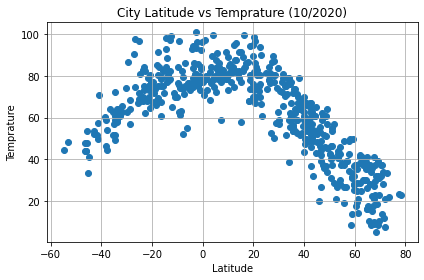

In [25]:
#gathering the 
latitude = city_df_2['Lat']
temprature = city_df_2['Max Temp']

#creating the scatter plot
plt.title('City Latitude vs Temprature (10/2020)')
plt.xlabel('Latitude')
plt.ylabel('Temprature')
plt.scatter(latitude, temprature)
plt.grid(True)
plt.tight_layout()
plt.show()

## Latitude vs. Humidity Plot

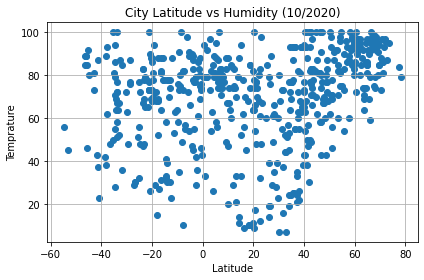

In [27]:
#gathering the humidity
humidity = city_df_2['Humidity']

#creating the scatter plot
plt.title('City Latitude vs Humidity (10/2020)')
plt.xlabel('Latitude')
plt.ylabel('Temprature')
plt.scatter(latitude, humidity)
plt.grid(True)
plt.tight_layout()
plt.show()

## Latitude vs. Cloudiness Plot

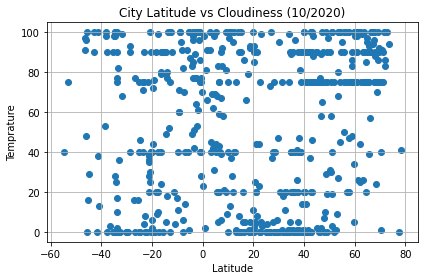

In [29]:
#gathering the cloudiness
cloudiness = city_df_2['Cloudiness']

#creating the scatter plot
plt.title('City Latitude vs Cloudiness (10/2020)')
plt.xlabel('Latitude')
plt.ylabel('Temprature')
plt.scatter(latitude, cloudiness)
plt.grid(True)
plt.tight_layout()
plt.show()

## Latitude vs. Wind Speed Plot

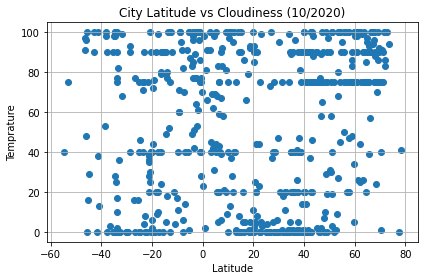

In [31]:
#gathering the wind speed
wind_speed = city_df_2['Wind Speed']

#creating the scatter plot
plt.title('City Latitude vs Cloudiness (10/2020)')
plt.xlabel('Latitude')
plt.ylabel('Temprature')
plt.scatter(latitude, cloudiness)
plt.grid(True)
plt.tight_layout()
plt.show()

## Linear Regression

In [34]:
#gathering the data for the northern and southtern hemisphere
northern_hemisphere = city_df_2.loc[city_df_2['Lat'] >= 0, 'Lat']
southern_hemisphere = city_df_2.loc[city_df_2['Lat'] <= 0, 'Lat']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.89


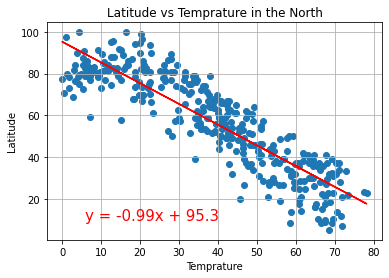

In [38]:
temprature_north = city_df_2.loc[city_df_2['Lat'] >= 0, 'Max Temp']

#getting the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere, temprature_north)
regress_values = northern_hemisphere * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting the scatter
plt.scatter(northern_hemisphere,temprature_north)

#plotting the regression line
plt.plot(northern_hemisphere,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f'The r-value is {round(rvalue,2)}')

#making the scatter pretty
plt.title('Latitude vs Temprature in the North')
plt.xlabel('Temprature')
plt.ylabel('Latitude')
plt.grid(True)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.72


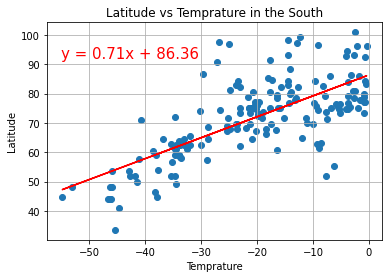

In [51]:
temprature_south = city_df_2.loc[city_df_2['Lat'] <= 0, 'Max Temp']

#getting the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere, temprature_south)
regress_values = southern_hemisphere * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting the scatter
plt.scatter(southern_hemisphere,temprature_south)

#plotting the regression line
plt.plot(southern_hemisphere,regress_values,"r-")
plt.annotate(line_eq,(-55,92),fontsize=15,color="red")
print(f'The r-value is {round(rvalue,2)}')

#making the scatter pretty
plt.title('Latitude vs Temprature in the South')
plt.xlabel('Temprature')
plt.ylabel('Latitude')
plt.grid(True)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.36


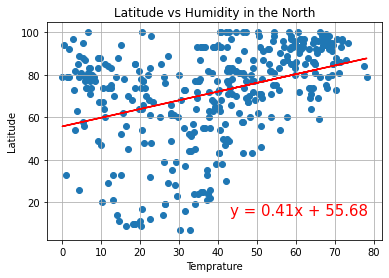

In [46]:
humidity_north = city_df_2.loc[city_df_2['Lat'] >= 0, 'Humidity']

#getting the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere, humidity_north)
regress_values = northern_hemisphere * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting the scatter
plt.scatter(northern_hemisphere,humidity_north)

#plotting the regression line
plt.plot(northern_hemisphere,regress_values,"r-")
plt.annotate(line_eq,(43,14),fontsize=15,color="red")
print(f'The r-value is {round(rvalue,2)}')

#making the scatter pretty
plt.title('Latitude vs Humidity in the North')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.grid(True)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.0


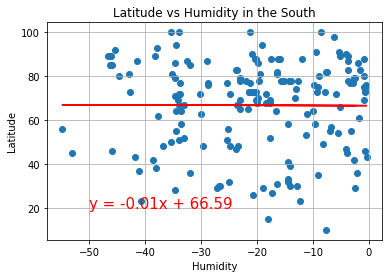

In [66]:
humidity_south = city_df_2.loc[city_df_2['Lat'] <= 0, 'Humidity']

#getting the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere, humidity_south)
regress_values = southern_hemisphere * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting the scatter
plt.scatter(southern_hemisphere,humidity_south)

#plotting the regression line
plt.plot(southern_hemisphere,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print(f'The r-value is {round(rvalue,2)}')

#making the scatter pretty
plt.title('Latitude vs Humidity in the South')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.grid(True)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.28


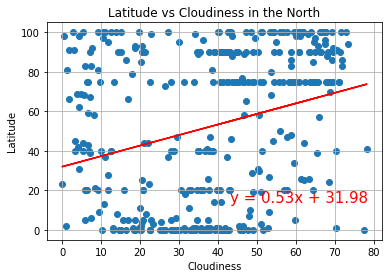

In [52]:
cloudiness_north = city_df_2.loc[city_df_2['Lat'] >= 0, 'Cloudiness']

#getting the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere, cloudiness_north)
regress_values = northern_hemisphere * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting the scatter
plt.scatter(northern_hemisphere,cloudiness_north)

#plotting the regression line
plt.plot(northern_hemisphere,regress_values,"r-")
plt.annotate(line_eq,(43,14),fontsize=15,color="red")
print(f'The r-value is {round(rvalue,2)}')

#making the scatter pretty
plt.title('Latitude vs Cloudiness in the North')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.grid(True)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.14


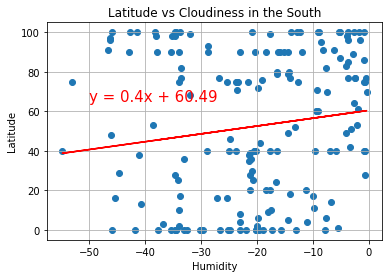

In [65]:
cloudiness_south = city_df_2.loc[city_df_2['Lat'] <= 0, 'Cloudiness']

#getting the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere, cloudiness_south)
regress_values = southern_hemisphere * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting the scatter
plt.scatter(southern_hemisphere,cloudiness_south)

#plotting the regression line
plt.plot(southern_hemisphere,regress_values,"r-")
plt.annotate(line_eq,(-50,65),fontsize=15,color="red")
print(f'The r-value is {round(rvalue,2)}')

#making the scatter pretty
plt.title('Latitude vs Cloudiness in the South')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.grid(True)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.14


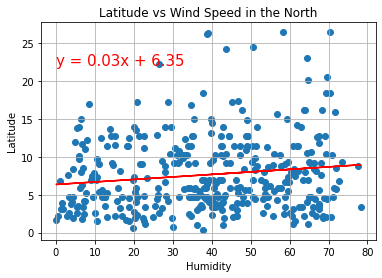

In [61]:
wind_speed_north = city_df_2.loc[city_df_2['Lat'] >= 0, 'Wind Speed']

#getting the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere, wind_speed_north)
regress_values = northern_hemisphere * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting the scatter
plt.scatter(northern_hemisphere,wind_speed_north)

#plotting the regression line
plt.plot(northern_hemisphere,regress_values,"r-")
plt.annotate(line_eq,(0,22),fontsize=15,color="red")
print(f'The r-value is {round(rvalue,2)}')

#making the scatter pretty
plt.title('Latitude vs Wind Speed in the North')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.grid(True)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.18


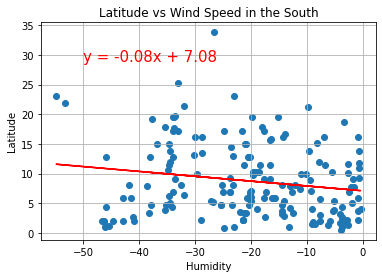

In [63]:
wind_speed_south = city_df_2.loc[city_df_2['Lat'] <= 0, 'Wind Speed']

#getting the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere, wind_speed_south)
regress_values = southern_hemisphere * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting the scatter
plt.scatter(southern_hemisphere,wind_speed_south)

#plotting the regression line
plt.plot(southern_hemisphere,regress_values,"r-")
plt.annotate(line_eq,(-50,29),fontsize=15,color="red")
print(f'The r-value is {round(rvalue,2)}')

#making the scatter pretty
plt.title('Latitude vs Wind Speed in the South')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.grid(True)